<a href="https://colab.research.google.com/github/aimbsg/EVA4_S13/blob/master/S13_B2_YoloV3_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to this Colab File: LINK (https://colab.research.google.com/drive/1LbKkQf4hbIuiUHunLlvY-cc0d_sNcAgS)

Refer to this GitHub Repo (https://github.com/theschoolofai/YoloV3)

Collect a dataset of 500 images and annotate them. Please select a class for which you can find a YouTube video as well. Steps are explained in the readme.md file on GitHub.

Once done:
*   Download (https://www.y2mate.com/en19.) a very small (~10-30sec) video from youtube which shows your class.
*   Use ffmpeg (https://en.wikibooks.org/wiki/FFMPEG_An_Intermediate_Guide/image_sequence) to extract frames from the video. 
Upload on your drive (alternatively you could be doing all of this on your drive to save upload time)
*   Inter on these images using detect.py file. **Modify** detect.py file if your file names do not match the ones mentioned on GitHub. 
*   `python detect.py --conf-thres 0.3 --output output_folder_name`
*   Use ffmpeg (Links to an external site.) to convert the files in your output folder to video
*   Upload the video to YouTube.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
%cd '/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/'

/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset


In [0]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 13.82 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [0]:
%cd '/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/data/customdata/'

/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/data/customdata


In [0]:
!ls

custom.data  custom.names  custom.shapes  custom.txt  images  labels


In [0]:
fh = open("custom.names", mode="r+")
ftext = 'doraemon'
fh.truncate()
fh.write(ftext)
fh.close()

In [0]:
%cd '/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/'

/content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [0]:
!ls

 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     video
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights
 out_out	   results.txt	  train.py


In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CPU

2020-04-24 13:48:46.556010: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2534      0 --:--:-- --:--:-- --:--:--  2534
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0 

In [0]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-25 06:11:10.476142: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:11<00:00,  1.77it/s]
Caching images (0.0GB): 100% 20/20 [00:18<00:00,  1.10it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 1086.16i

In [0]:
!python detect.py --conf-thres 0.1 --output out_video # Modified source in detect.py
# !python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4" # Alternate way to input video for prediction

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_video', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1142) /content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/video/doraemon_1080p.mp4: 320x512 1 doraemons, Done. (0.035s)
video 1/1 (2/1142) /content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/video/doraemon_1080p.mp4: 320x512 1 doraemons, Done. (0.033s)
video 1/1 (3/1142) /content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/video/doraemon_1080p.mp4: 320x512 1 doraemons, Done. (0.033s)
video 1/1 (4/1142) /content/gdrive/My Drive/EVA4_S13_Yolo_Custom_Dataset/YoloV3/video/doraemon_1080

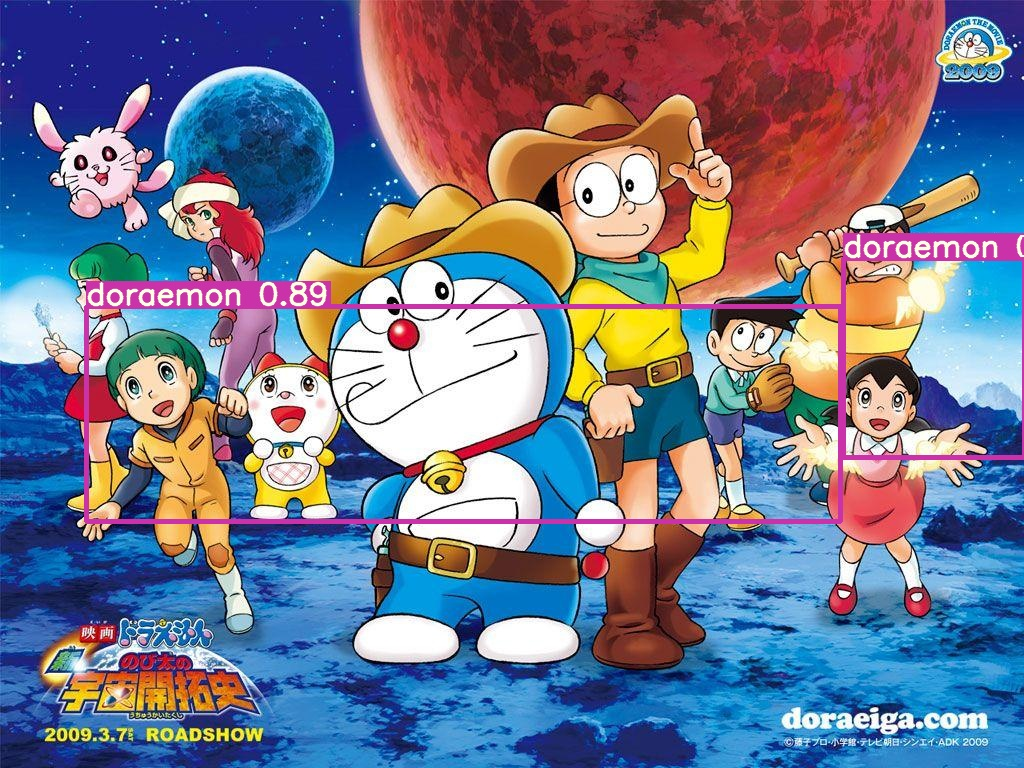

In [0]:
Image(filename='out_out/img190.jpg', width=600)

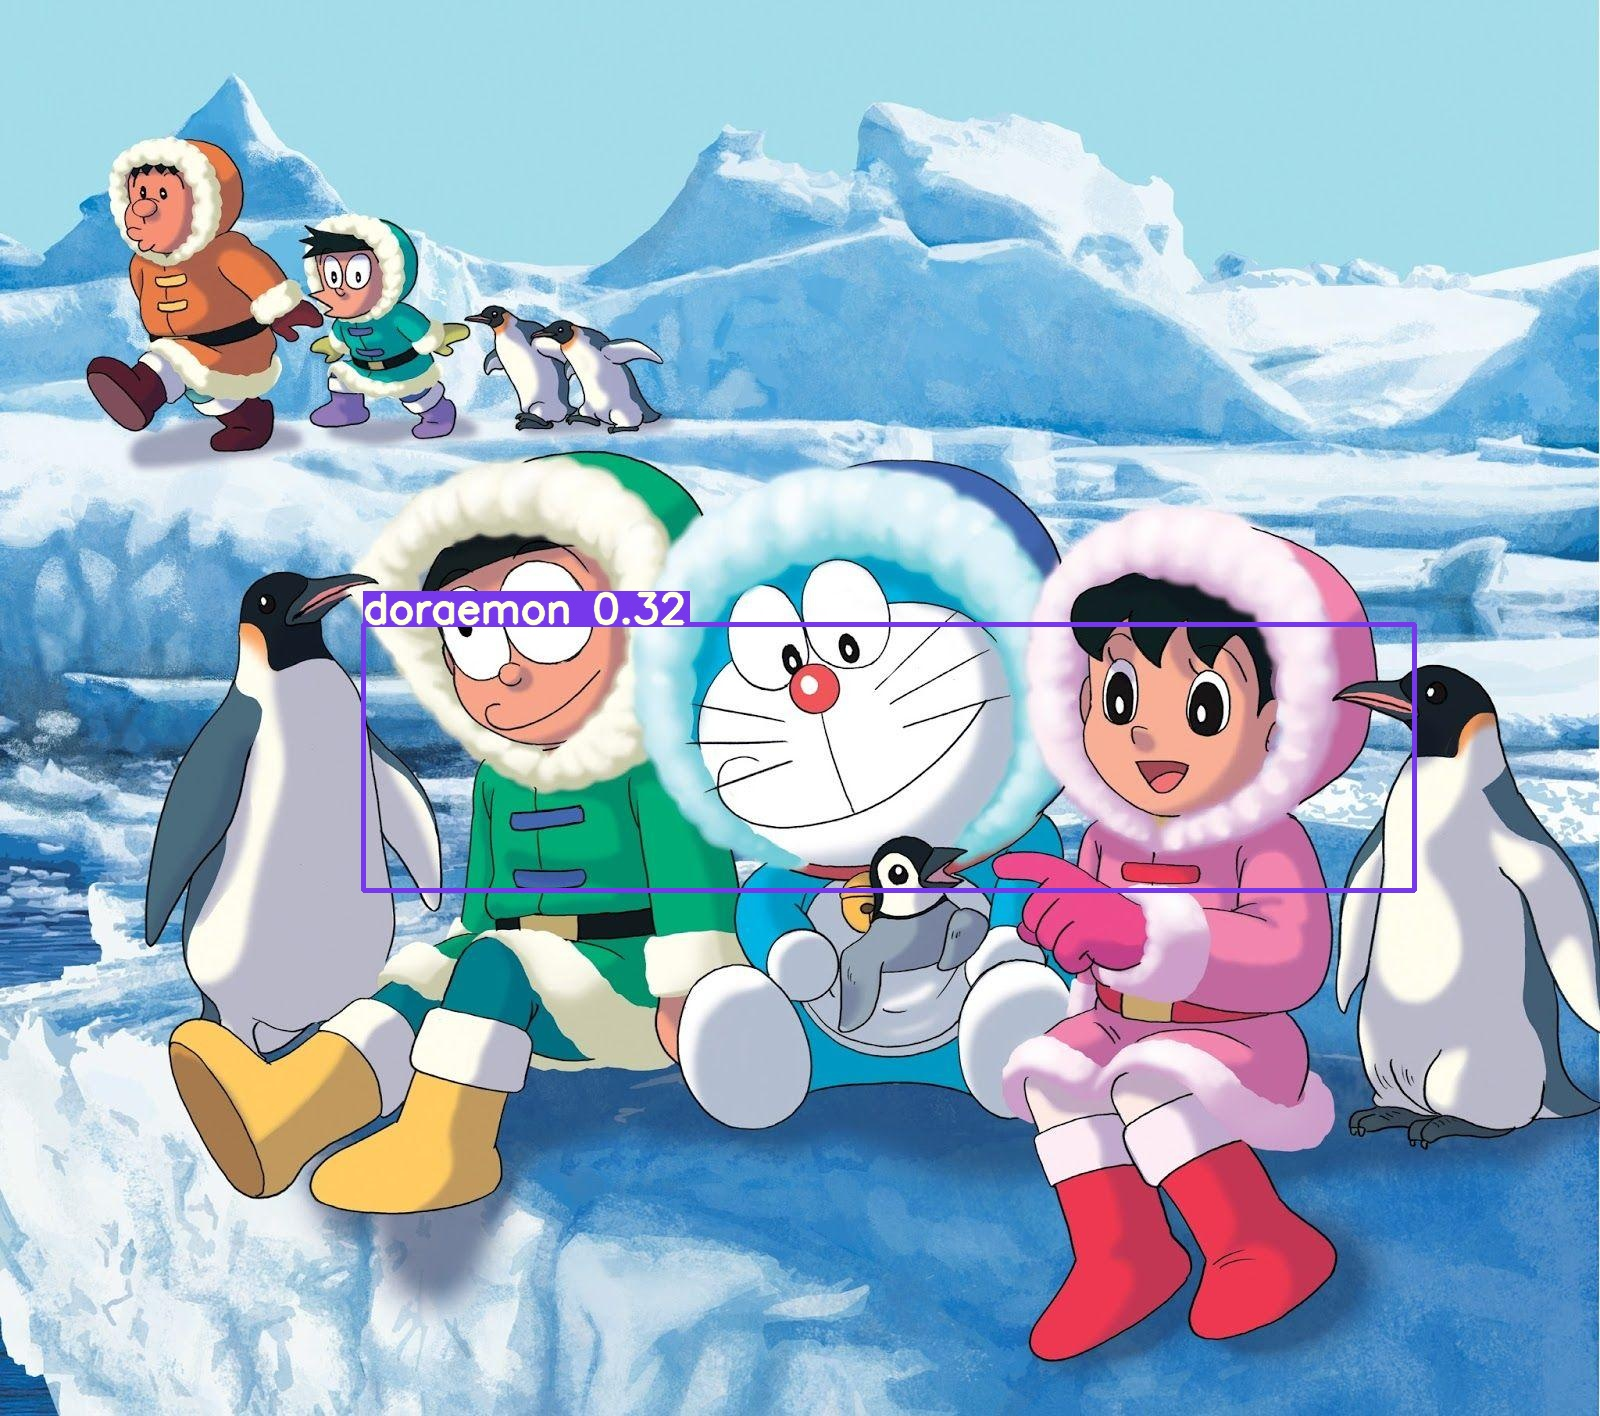

In [0]:
Image(filename='out_out/img199.jpg', width=600)